## Importing libraries

In [12]:
import pandas as pd
import numpy as np

## Read csv file

In [13]:
df = pd.read_csv('air_quality.csv')
adf=df
adf.head(3)

,date,parameter,location,value,unit,city,attribution,averagingperiod,coordinates,country,sourcename,sourcetype,mobile
0,"{utc=2006-11-13T06:42:00.000Z, local=2006-11-1...",pm25,JTA - Jamestown,115.56,µg/m³,Accra,"[{name=Dr. Raphael E. Arku and Colleagues, url...","{unit=hours, value=48.0}","{latitude=5.540114, longitude=-0.2103972}",GH,Dr. Raphael E. Arku and Colleagues,research,False
1,"{utc=2006-11-13T06:42:00.000Z, local=2006-11-1...",pm10,JTA - Jamestown,161.09,µg/m³,Accra,"[{name=Dr. Raphael E. Arku and Colleagues, url...","{unit=hours, value=48.0}","{latitude=5.540114, longitude=-0.2103972}",GH,Dr. Raphael E. Arku and Colleagues,research,False
2,"{utc=2006-11-13T07:13:00.000Z, local=2006-11-1...",pm25,JTC - Jamestown,104.80,µg/m³,Accra,"[{name=Dr. Raphael E. Arku and Colleagues, url...","{unit=hours, value=48.0}","{latitude=5.5349193, longitude=-0.2124056}",GH,Dr. Raphael E. Arku and Colleagues,research,False


## Cleaning Data

In [14]:
columns_to_keep = ['date', 'parameter', 'location', 'value', 'averagingperiod', 'coordinates']
adf = adf[columns_to_keep]
adf = adf.rename(columns={'date':'long_date', 'averagingperiod':'avgpd'})

In [15]:
adf['date'] = adf.long_date.str.slice(5, 15)
adf['time'] = adf.long_date.str.slice(16, 21)
adf['datetime'] = pd.to_datetime(adf['date'] + ' ' + adf['time'])

adf['coordinates'] = adf.coordinates.str.strip('{latitude=}').str.replace('longitude=','')

split_cd = adf.coordinates.str.split(', ')
adf['lat'] = split_cd.apply(lambda x: x[0])
adf['long'] = split_cd.apply(lambda x: x[1])

adf['avgpd'] = adf.avgpd.str.extract('(\d+\.\d+)')
adf['avgpd'] = pd.to_numeric(adf.avgpd)

adf.drop('long_date', axis=1, inplace=True)
adf.drop('coordinates', axis=1, inplace=True)

split_loc = adf.location.str.split('-')
adf['area'] = split_loc.apply(lambda x: x[1]).str.strip()

adf = adf[adf['avgpd'] != 0] # Delete rows where the recording duration was 0

cols_arrange = ['area', 'location', 'parameter', 'value', 'lat', 'long', 'avgpd', 'date', 'time', 'datetime']
adf = adf[cols_arrange]

In [16]:
adf.head()

,area,location,parameter,value,lat,long,avgpd,date,time,datetime
0,Jamestown,JTA - Jamestown,pm25,115.56,5.540114,-0.2103972,48.0,2006-11-13,06:42,2006-11-13 06:42:00
1,Jamestown,JTA - Jamestown,pm10,161.09,5.540114,-0.2103972,48.0,2006-11-13,06:42,2006-11-13 06:42:00
2,Jamestown,JTC - Jamestown,pm25,104.80,5.5349193,-0.2124056,48.0,2006-11-13,07:13,2006-11-13 07:13:00
3,Jamestown,JTC - Jamestown,pm10,187.21,5.5349193,-0.2124056,48.0,2006-11-13,07:13,2006-11-13 07:13:00
4,Jamestown,JTT - Jamestown,pm25,86.29,5.5334554,-0.2129917,48.0,2006-11-13,07:31,2006-11-13 07:31:00


## EDA

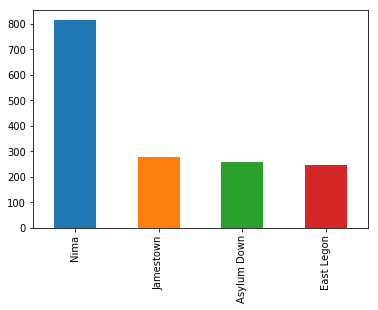

In [17]:
adf['area'].value_counts().plot.bar()

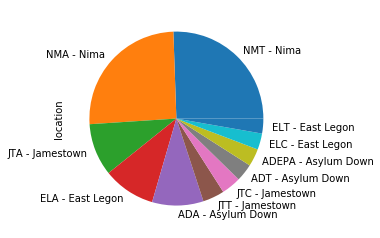

In [18]:
adf['location'].value_counts().plot.pie()

import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

Text(0.5,1,'Frequency of Recording Periods')

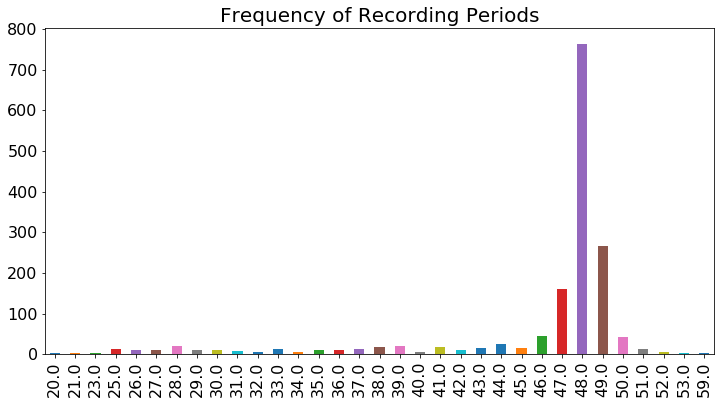

In [19]:
ax = adf.loc[(adf['avgpd'] >= 20), 'avgpd'].value_counts().sort_index().plot.bar(
    figsize=(12, 6),
    fontsize=16,
)

ax.set_title('Frequency of Recording Periods', fontsize=20)

Text(0.5,1,'Frequency of Recording Periods b/n (45-50 hrs)')

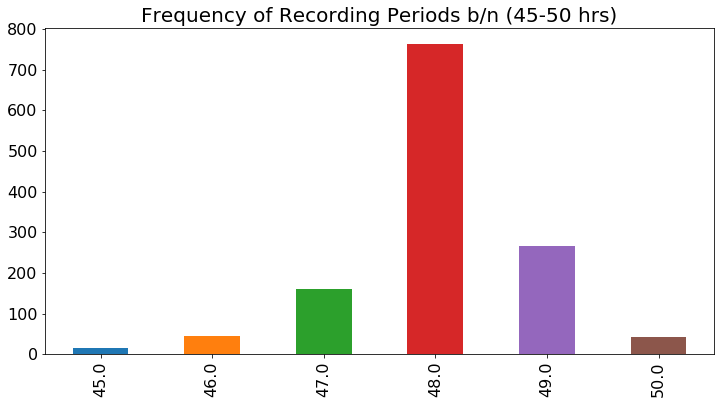

In [20]:
ax = adf.loc[((adf['avgpd'] >= 45) & (adf['avgpd'] <= 50)), 'avgpd'].value_counts().sort_index().plot.bar(
    figsize=(12, 6),
    fontsize=16,
)

ax.set_title('Frequency of Recording Periods b/n (45-50 hrs)', fontsize=20)

In [ ]:
adf.sample(200).plot.hexbin(x='avgpd', y='value', gridsize=15, sharex=False)

In [ ]:
len(adf)

In [ ]:
adf.loc[~((adf['avgpd'] >= 45) & (adf['avgpd'] <= 50)), 'avgpd'].value_counts().sum()

In [ ]:
adf.loc[(adf['avgpd'] <= 40), 'avgpd'].value_counts().sum()